# Find the closest pair of points in a set of points in 2-dimensional Euclidean space by using Manhattan Distance 

## Please noted all the code are written in Python 3.0 in jupyter notebook 
    
## Please noted that this file only contain Task1 to Task 5 and
## there is a Part B for Task 6 in seperated jpynb file named "asst1_Task6.ipynb"

Find the closest pair of points in a set of points in 2-dimensional Euclidean space by using Manhattan Distance 

Task includes: 

1. ADT Point Class
2. ADT Point Set Class
3. (a) Closest Pair (Brute Force Implementation)         
   (b) Closest Pair (Divide & Conquer Implementation)
4. Runtime - Empirical Analysis
5. Recurrence Relation
6. (Bonus) Visualisation (optional)   ------- in Part B file

### Import the package needed

In [1]:
from math import *

from matplotlib import pyplot as plt
from matplotlib.pyplot import *
matplotlib.style.use("ggplot")

import pandas as pd
import random

from timeit import Timer
import timeit

from bokeh.models import Label
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Scatter, show
from bokeh.models import Span
from bokeh.palettes import Category20

## Task 1.  ADT Point Class

In [2]:
class Point: 
    #ADT Point Class: class for representing and manipulating x,y coordinates for the point
    
    def __init__(self, x, y):  
        #create a new point at the given coordinates
        self.x = x
        self.y = y

    def getX(self):
        #get point's x coordinate
        return self.x

    def getY(self): 
        #get point's y coordinate
        return self.y
    
    def manHattan_distance(self, other):
        #calculate and return two points' Manhattan distance 
        d = abs(other.x - self.x) + abs(other.y - self.y)  
        return d
    
    def __str__(self):
        #print point(string representation)
        return "x=" + str(self.x) + ", y=" + str(self.y)

## Task 2.  ADT Point Set Class &  
## Task 3.   (a) Closest Pair (Brute Force Implementation)  (b) Closest Pair (Divide & Conquer Implementation)

### Difference of Euclidean distance and Manhattan distance in finding closest pair points:
In the assignment, we are required to use Manhattan distance to find the closest pair points instead of Euclidean distance. The part we have to change in the algorithm to accommodate Manhattan distance is in the Divide & Conquer Implementation of finding closest pair that the two points are in the different section separated by a middle point in the list. Divide & Conquer method keeps splitting points to two parts to find the smaller distance  (d) of two points. However, there may have points separated by the splitlines with the smallest distance that the Divide & Conquer method cannot find. 
Hence, we have to search if there is any smaller distance in the area with d (return by Divide & Conquer method) both side from the middle of x axis that the two points separated by the splitline and to compare it with the smallest distance got from the Divide & Conquer method to determine the ultimately result of closest pair points.  For searching the smallest distance for point within this area is to sort the points by y axis and for Euclidean distance as mathematical concept (see below picture), we only need to compare point with its next 7 points which can guarantee to get the result of smallest distance in this area with two points separated by splitline. However, in Manhattan distance, we have to compare not only point with its next 7 points but 11 points to be guaranteed to get the correct result. 
Both Euclidean distance and Manhattan distance, we don’t need to check all points with each other to get the smallest distance in the split area. But the at least number of points check is different, for Euclidean distance is check at least 7 points while for Manhattan distance is 11 points.

* see below png file for the explanation for the difference

<img src="Difference of Euclidean distance and Manhattan distance.PNG">

In [3]:
class Point_set:
    #ADT Point Set Class: class for modeling a point set 
    
    def __init__(self, val = []):   
        #create a empty list if no list of points given 

        self.contents = list(set(val))  
        #remove the duplicated points in the list   
        
        self.contents = sorted( self.contents, key=lambda x: x[0]) 
        #sorte the points in the list by x coordinate in ascending order
        self.left = None 
        self.right = None
        self.cen = None

    def insert (self, px, py): 
        #insertion method to append new given points to the list 
        
        if (px,py) not in self.contents:
            self.point = Point (px,py)
            self.contents.append((self.point.getX(),self.point.getY()))
        
        self.contents = sorted( self.contents, key=lambda x: x[0])
        #sorte the points in the list by x coordinate in ascending order after new point been appended to the list
        return self.contents
    
    def delete(self, px, py): 
        #dleletion method to remove points from the list 
        
        if (px,py) in self.contents:
            self.point = Point(px,py)
            self.contents.remove((self.point.getX(),self.point.getY()))
        return self.contents
    
    def closest_pair_dc(self): 
        #Divide & Conquer Implementation of finding the closest pair of points
       
        ln = len(self.contents) 
        #get number of total points 
        if ln <= 3: 
            #when points in the list less than or equal to 3, use Brute Force Implementation instead
            return self.closest_pair_brute()
        
        #find middle point to split the points to two lists of points (left and right) 
        #and call recursively both lists after spliting
        mid = ln // 2          
        
        self.left = Point_set(self.contents[:mid])
        self.right = Point_set(self.contents[mid:])
        
        (p1, q1, mi1) = self.left.closest_pair_dc()
        (p2, q2, mi2) = self.right.closest_pair_dc()
        
        #determine smaller distance between points in the two lists of points (left and right) 
        if mi1 <= mi2:  
            #smaller distance with points
            d = mi1               
            mn = (p1, q1)        
        
        else:
            #smaller distance with points
            d = mi2               
            mn = (p2, q2)        
    
        #call method to get smallest distance between points within the boundary of determined smaller distance
        #(found in the Divide & Conquer Implementation) from middle point to the left and middle point to the right
        self.cen = Point_set(self.contents)
        (p3, q3, mi3) = self.cen.closest_split_pair(d, mn)
        
        #determine pair points with the smallest distance between in the points list
        if d <= mi3:
            #smaller distance is the smallest distance after compare
            return mn[0], mn[1], d     
        else:
            #smallest distance is with one point in left and the other in right
            return p3, q3, mi3        
    
    def closest_split_pair(self, d , best_pair): 
        #get smallest distance between points within the boundary
        
        #create a sublist of points not further than distance from midpoint on x-sorted list
        ln = len(self.contents)
        mid = ln // 2   
        s_y = [ p for p in self.contents if p[0] >= self.contents[mid][0] - d and p[0] <= self.contents[mid][0] + d]
        
        s_y = sorted( s_y, key=lambda x: x[1])
        # sorte the points in the sublist by y coordinate in ascending order
       
        #from the first points in the y-sorted sublist, check the distance of point with the next 11 points for each points
        #in the list to get the smallest distance for a pair points in sublist 
        best = d
        ln_y = len(s_y)  
        for i in range(ln_y - 1):
            for j in range(i+1, min(i + 11, ln_y)):
                x,y = self.contents[i]
                x1,y1 = self.contents[j]
                a = Point(x,y)
                b = Point(x1,y1)
                dst = a.manHattan_distance(b) 
                if dst < best:
                    best = dst
                    best_pair = ((a.getX(),a.getY()), (b.getX(),b.getY()))
        return best_pair[0], best_pair[1], best        
                        
    def closest_pair_brute(self):   
        #Brute Force implementation to return the two closest pairs of points and the minDistance
        
        #computie the distances between all the pairs of points, then pick the pair with the smallest distance
        x,y = self.contents[0]
        x1,y1 = self.contents[1]
        p = Point(x,y)
        q = Point(x1,y1)
        mi = p.manHattan_distance(q)  
        px = p.getX()
        py = p.getY()
        qx = q.getX()
        qy = q.getY()
        ln = len(self.contents)
        if ln == 2:
            return (px,py), (qx,qy), mi
        for i in range(ln-1):
            for j in range(i+1, ln):
                if i!=0 and j!=1:
                    x,y = self.contents[i]
                    x1,y1 = self.contents[j]
                    a = Point(x,y)
                    b = Point(x1,y1)
                    d = a.manHattan_distance(b) 
                    if d < mi:
                        mi = d
                        px= a.getX()
                        py= a.getY()
                        qx= b.getX()
                        qy= b.getY()
                        mi = d
        return (px,py), (qx,qy), mi #smallest distance with points

* Test and output the result for two Implementations of finding cloest pair points

In [4]:
#generate points for testing the find closest pair function for both Implementations
lst = [(random.randint(-100, 100) ,random.randint(-100, 100)) for i in range(100)]

def find_closest_pair_points_burte(p_set):
    a = Point_set(p_set)
    ans = a.closest_pair_brute()
    return ans

def find_closest_pair_points_dc(p_set):
    a = Point_set(p_set)
    ans = a.closest_pair_dc()
    return ans

#output the result for Divide & Conquer Implementation
ans = find_closest_pair_points_dc(lst)
print ("Divide & Conquer Implementation: Closest Pair:", ans[0],",",ans[1], "with Manhattan distance =",str(ans[2]))

#output the result for Brute Force Implementation
ans = find_closest_pair_points_burte(lst)
print ("Brute Force Implementation: Closest Pair:", ans[0],",",ans[1], "with Manhattan distance =",str(ans[2]))

Divide & Conquer Implementation: Closest Pair: (58, -48) , (58, -45) with Manhattan distance = 3
Brute Force Implementation: Closest Pair: (58, -45) , (58, -48) with Manhattan distance = 3


## Task 4.  Runtime Empirical Analysis

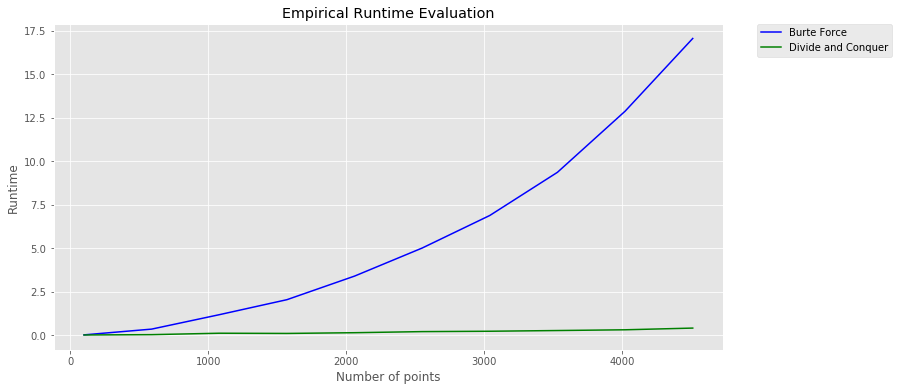

In [5]:
def find_cloest_pair_points_brute(p_set):
    a = Point_set(p_set)
    ans = a.closest_pair_brute()
    return ans

def find_cloest_pair_points_dc(p_set):
    a = Point_set(p_set)
    ans = a.closest_pair_dc()
    return ans

#define function to run the Runtime - Empirical Analysis
def empirical_runtime_evaluation(method):
    x = []
    y = []
    for i in range (100, 5000, 490):
        x.append(i)
        lst = [(random.randint(-100, 100) ,random.randint(-100, 100)) for i in range(i)]
        test_fn = method
        t = Timer(lambda: test_fn(lst))
        time = t.timeit(number=1)
        y.append(time)
    return x, y


#output the result of Runtime - Empirical Analysis as graph 
plt.figure(figsize = (12, 6))
x,y = empirical_runtime_evaluation(find_cloest_pair_points_brute) 
plt.plot(x, y ,'b',label="Burte Force")

x,y = empirical_runtime_evaluation(find_cloest_pair_points_dc) 
plt.plot(x, y ,'g',label="Divide and Conquer")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of points')
plt.ylabel('Runtime')
plt.title('Empirical Runtime Evaluation')
plt.show()

## Task 5.  Recurrence Relation

* The runtime recurrence relation for Divide and Conquer algorithm of finding closest pair point by passing sorted lists down the recursion is:

      T(n) = 2T(n/2)+ O(n)
           = O(nlogn)


* The runtime recurrence relation for Divide and Conquer algorithm of finding closest pair point that list sorted on each level of the recursion is:

      T(n) = 2T(n/2) + 2T(n/2) + O(n)
           = 2T(n/2) + O(nlogn)
